In [3]:
import pandas as pd
from pathlib import Path
from pred_introverts_extroverts.features import add_composite_mean, add_composite_pca

project_root = Path.cwd().parent
raw_path = project_root / "data" / "raw" / "train.csv"
train = pd.read_csv(raw_path)
train = add_composite_mean(train)
train = add_composite_pca(train.dropna())

Variância explicada pelo 1º componente: 58.79%


In [4]:
train.isnull().sum()

id                           0
Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
social_score_mean            0
social_score_pca             0
dtype: int64

In [5]:
print(f"Columns are: {train.columns.tolist()}")
print(f"Size is {train.size}")
print(f"Trying to predict Personality with values {train.Personality.value_counts()}")
print(f"Types are {train.dtypes}")
print(f"Categorical columns values are {[train[col].value_counts() for col in train.select_dtypes(exclude=["number"]).columns]}")

Columns are: ['id', 'Time_spent_Alone', 'Stage_fear', 'Social_event_attendance', 'Going_outside', 'Drained_after_socializing', 'Friends_circle_size', 'Post_frequency', 'Personality', 'social_score_mean', 'social_score_pca']
Size is 112079
Trying to predict Personality with values Personality
Extrovert    8422
Introvert    1767
Name: count, dtype: int64
Types are id                             int64
Time_spent_Alone             float64
Stage_fear                    object
Social_event_attendance      float64
Going_outside                float64
Drained_after_socializing     object
Friends_circle_size          float64
Post_frequency               float64
Personality                   object
social_score_mean            float64
social_score_pca             float64
dtype: object
Categorical columns values are [Stage_fear
No     8488
Yes    1701
Name: count, dtype: int64, Drained_after_socializing
No     8487
Yes    1702
Name: count, dtype: int64, Personality
Extrovert    8422
Introvert    

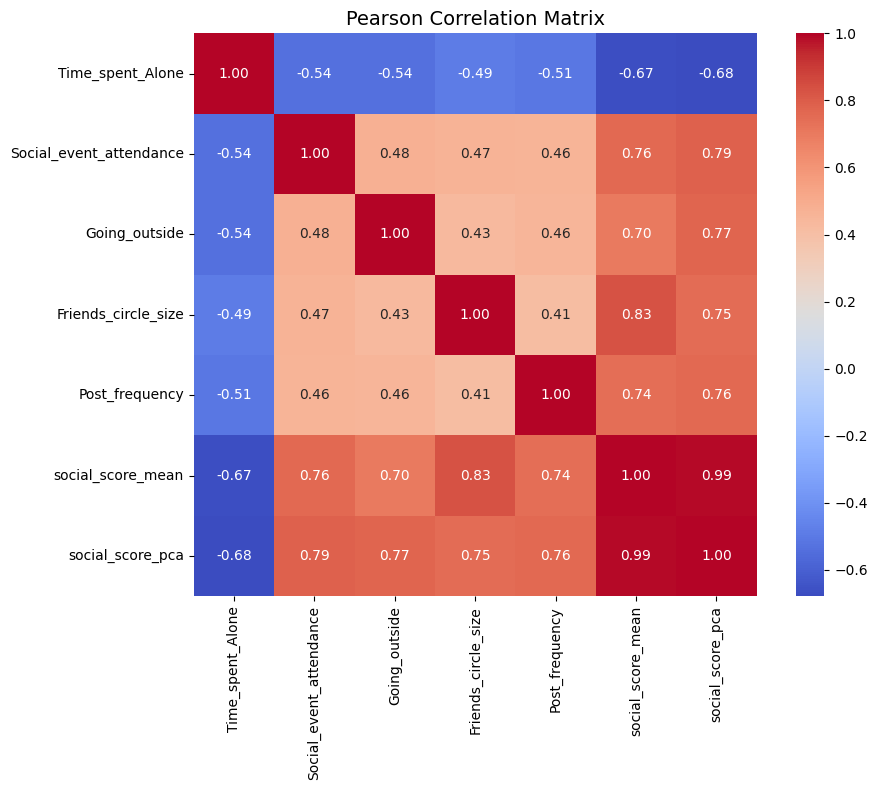

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,social_score_mean,social_score_pca
Time_spent_Alone,1.000000,-0.536790,-0.538454,-0.494501,-0.511138,-0.667902,-0.678779
Social_event_attendance,-0.536790,1.000000,0.476116,0.465702,0.460327,0.763405,0.788009
Going_outside,-0.538454,0.476116,1.000000,0.429871,0.455101,0.702081,0.771152
Friends_circle_size,-0.494501,0.465702,0.429871,1.000000,0.414544,0.829810,0.749289
Post_frequency,-0.511138,0.460327,0.455101,0.414544,1.000000,0.741883,0.757908
social_score_mean,-0.667902,0.763405,0.702081,0.829810,0.741883,1.000000,0.989596
social_score_pca,-0.678779,0.788009,0.771152,0.749289,0.757908,0.989596,1.000000


In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_correlation_matrix(df, method="pearson", figsize=(10, 8), annot=True, cmap="coolwarm"):
    """
    Plots the correlation matrix of numerical features in the dataframe.

    Parameters:
        df (pd.DataFrame): The input DataFrame.
        method (str): Correlation method ('pearson', 'kendall', 'spearman').
        figsize (tuple): Size of the plot.
        annot (bool): Whether to annotate the heatmap.
        cmap (str): Color map for heatmap.
    """
    numerical_df = df.select_dtypes(include=["number"])
    corr_matrix = numerical_df.corr(method=method)

    plt.figure(figsize=figsize)
    sns.heatmap(corr_matrix, annot=annot, cmap=cmap, fmt=".2f", square=True)
    plt.title(f"{method.title()} Correlation Matrix", fontsize=14)
    plt.tight_layout()
    plt.show()

    return corr_matrix

plot_correlation_matrix(train.drop(columns="id"))

In [9]:
cat_cols = train.select_dtypes(exclude=["number"])
num_cols = train.select_dtypes(include="number").columns.tolist()
for col in cat_cols:
    gpby = train.groupby(col)[num_cols].mean()
    print(gpby)

                     id  Time_spent_Alone  Social_event_attendance  \
Stage_fear                                                           
No          9234.340127          1.704877                 6.475848   
Yes         9392.185185          7.265138                 1.717813   

            Going_outside  Friends_circle_size  Post_frequency  \
Stage_fear                                                       
No               5.021442             9.636428        6.283577   
Yes              1.567313             2.847737        1.594944   

            social_score_mean  social_score_pca  
Stage_fear                                       
No                   6.854324          0.589771  
Yes                  1.931952         -2.942961  
                                    id  Time_spent_Alone  \
Drained_after_socializing                                  
No                         9235.665842          1.702722   
Yes                        9385.481786          7.272620   

             